In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000712771"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000712771
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,"ConnectOne Bancorp, Inc."
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,26.0,7.389231e+00,1.200456e+00,6.14,6.405000e+00,6.875000e+00,8.272500e+00,9.61
interest income,54.0,2.492217e+07,1.603133e+07,11519000.00,1.292325e+07,1.411100e+07,3.820200e+07,65209000.00
net income,54.0,5.337389e+06,5.034803e+06,-2024000.00,1.522250e+06,4.064500e+06,9.181750e+06,19902000.00
net interest income,54.0,1.802572e+07,1.271846e+07,5172000.00,8.108750e+06,1.129900e+07,3.027375e+07,44952000.00
provision for loan losses,54.0,1.894741e+06,4.195735e+06,-107000.00,1.500000e+05,8.295000e+05,1.450000e+06,25200000.00


# Plots

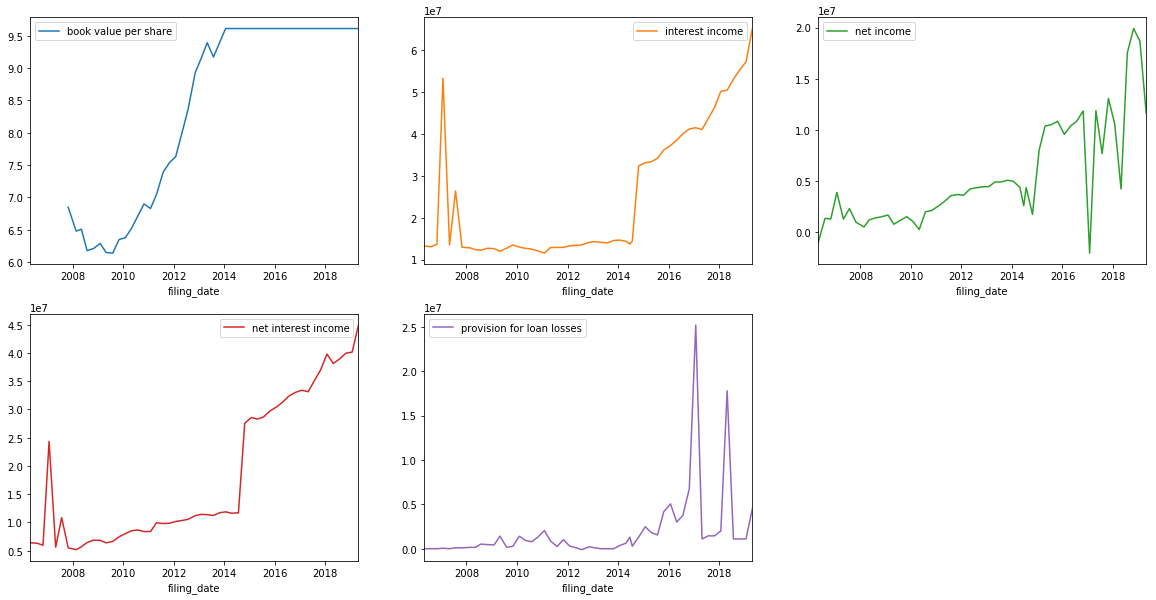

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000712771 book value per share        2006Q1 to 2007Q2: 6 periods    missing   
           book value per share       2014Q1 to 2019Q1: 21 periods    missing   
           net income                                       2014Q1  duplicate   
           provision for loan losses                        2014Q1  duplicate   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000712771 book value per share           Missing period  
           book value per share           Missing period  
           net income                   Duplicate period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()